![title](./images/es5.26-1.png)
![title](./images/es5.26-2.png)

![title](./images/es5.1.png)

# SOLUZIONE
## (i) Disegna la condensazione del digramma associato.
Di seguito il grafo associato alla matrice:

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def disegna_digrafo_da_matrice_adiacenza_stocastica(matrice_adiacenza):
    # Ottieni l'ordine numerico dei nodi
    ordine_nodi = list(range(len(matrice_adiacenza)))

    # Creiamo il digrafo partendo dalla matrice di adiacenza
    G = nx.DiGraph(matrice_adiacenza)

    # Imposta l'ordine dei nodi nel digrafo
    G = nx.relabel_nodes(G, dict(zip(G.nodes(), ordine_nodi)))

    # Disegniamo il grafico
    pos = nx.spring_layout(G)  # posizione per tutti i nodi
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show()

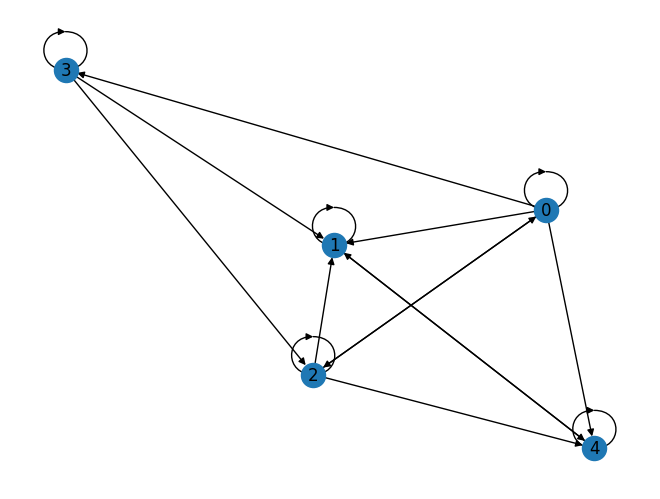

In [2]:
adj_matrix = np.array([
    [0.15, 0.15, 0.1, 0.2, 0.4],
    [0, 0.55, 0, 0, 0.45],
    [0.3, 0.05, 0.05, 0, 0.6],
    [0, 0.4, 0.1, 0.5, 0],
    [0, 0.3, 0, 0, 0.7]
])

disegna_digrafo_da_matrice_adiacenza_stocastica(adj_matrix)

Plot del digrafo condensato usando la libreria NetworkX:

In [3]:
def grafo_di_condensazione(matrice_adiacenza):
    # Creazione di un grafo diretto dalla matrice di adiacenza
    G = nx.from_numpy_array(matrice_adiacenza, create_using=nx.DiGraph)

    # Calcolo dei componenti fortemente connessi
    scc = nx.strongly_connected_components(G)

    # Creazione del grafo di condensazione
    condensazione = nx.condensation(G, scc)

    return condensazione

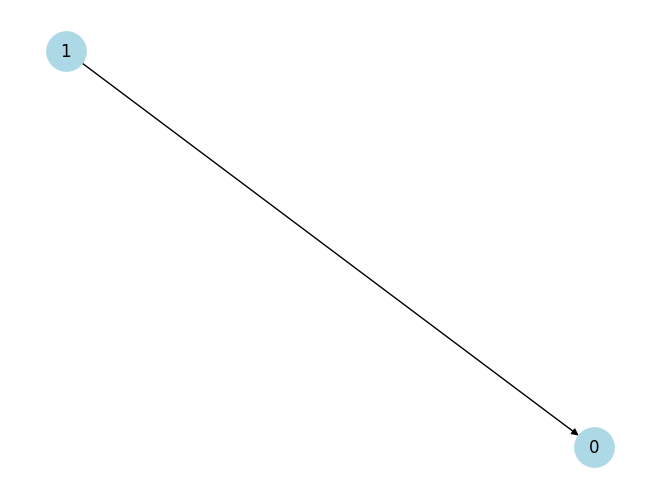

In [4]:
# Matrice di adiacenza fornita
matrice_adiacenza = np.array([
    [0.15, 0.15, 0.1, 0.2, 0.4],
    [0, 0.55, 0, 0, 0.45],
    [0.3, 0.05, 0.05, 0, 0.6],
    [0, 0.4, 0.1, 0.5, 0],
    [0, 0.3, 0, 0, 0.7]
])

# Generazione del grafo di condensazione
condensazione = grafo_di_condensazione(matrice_adiacenza)

# Disegno del grafo di condensazione
nx.draw(condensazione, with_labels=True, node_color='lightblue', node_size=800, font_size=12)
plt.show()

Di seguito il plot eseguito con il codice fornito da Bullo:

In [5]:
def plot_condensated_graph(G, axs3):
    """
    :param G: Digraph to be condensed
    :param axs3: 1 dim axs with at least 3 subplots locations
    """
    
    # Visualize initial digraph
    Gpos = nx.spring_layout(G)
    nx.draw_networkx(G, Gpos, node_size=40, ax=axs3[0], connectionstyle='arc3, rad = 0.2', with_labels=False)
    
    # Algorithm to compute the condensed digraph:
    G_conden = nx.algorithms.components.condensation(G)
    
    all_col = []
    # Compute coloring scheme for the condensed graph
    for u, node in G_conden.nodes(data=True):
        sg = node['members']
        co = np.random.rand(1,3)
        all_col.append(co)
    nx.draw_networkx_nodes(G.subgraph(sg), Gpos, node_size=40, node_color=co, ax=axs3[1])
    nx.draw_networkx_edges(G, Gpos, edgelist=G.edges(sg), edge_color=co, ax=axs3[1], connectionstyle='arc3, rad = 0.2')
    
    nx.draw_networkx(G_conden, node_size=40, ax=axs3[2], node_color=all_col, connectionstyle='arc3, rad = 0.2', with_labels=False)
    axs3[0].set_xlabel("Original digraph")
    axs3[1].set_xlabel("Strongly connected components")
    axs3[2].set_xlabel("Condensed digraph")

In [6]:
def generate_graph_from_adjacency(adj_matrix):
    """
    Generate a directed graph from an adjacency matrix.
    """
    G = nx.DiGraph()
    num_nodes = adj_matrix.shape[0]
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i][j] != 0:
                G.add_edge(i, j)
    return G

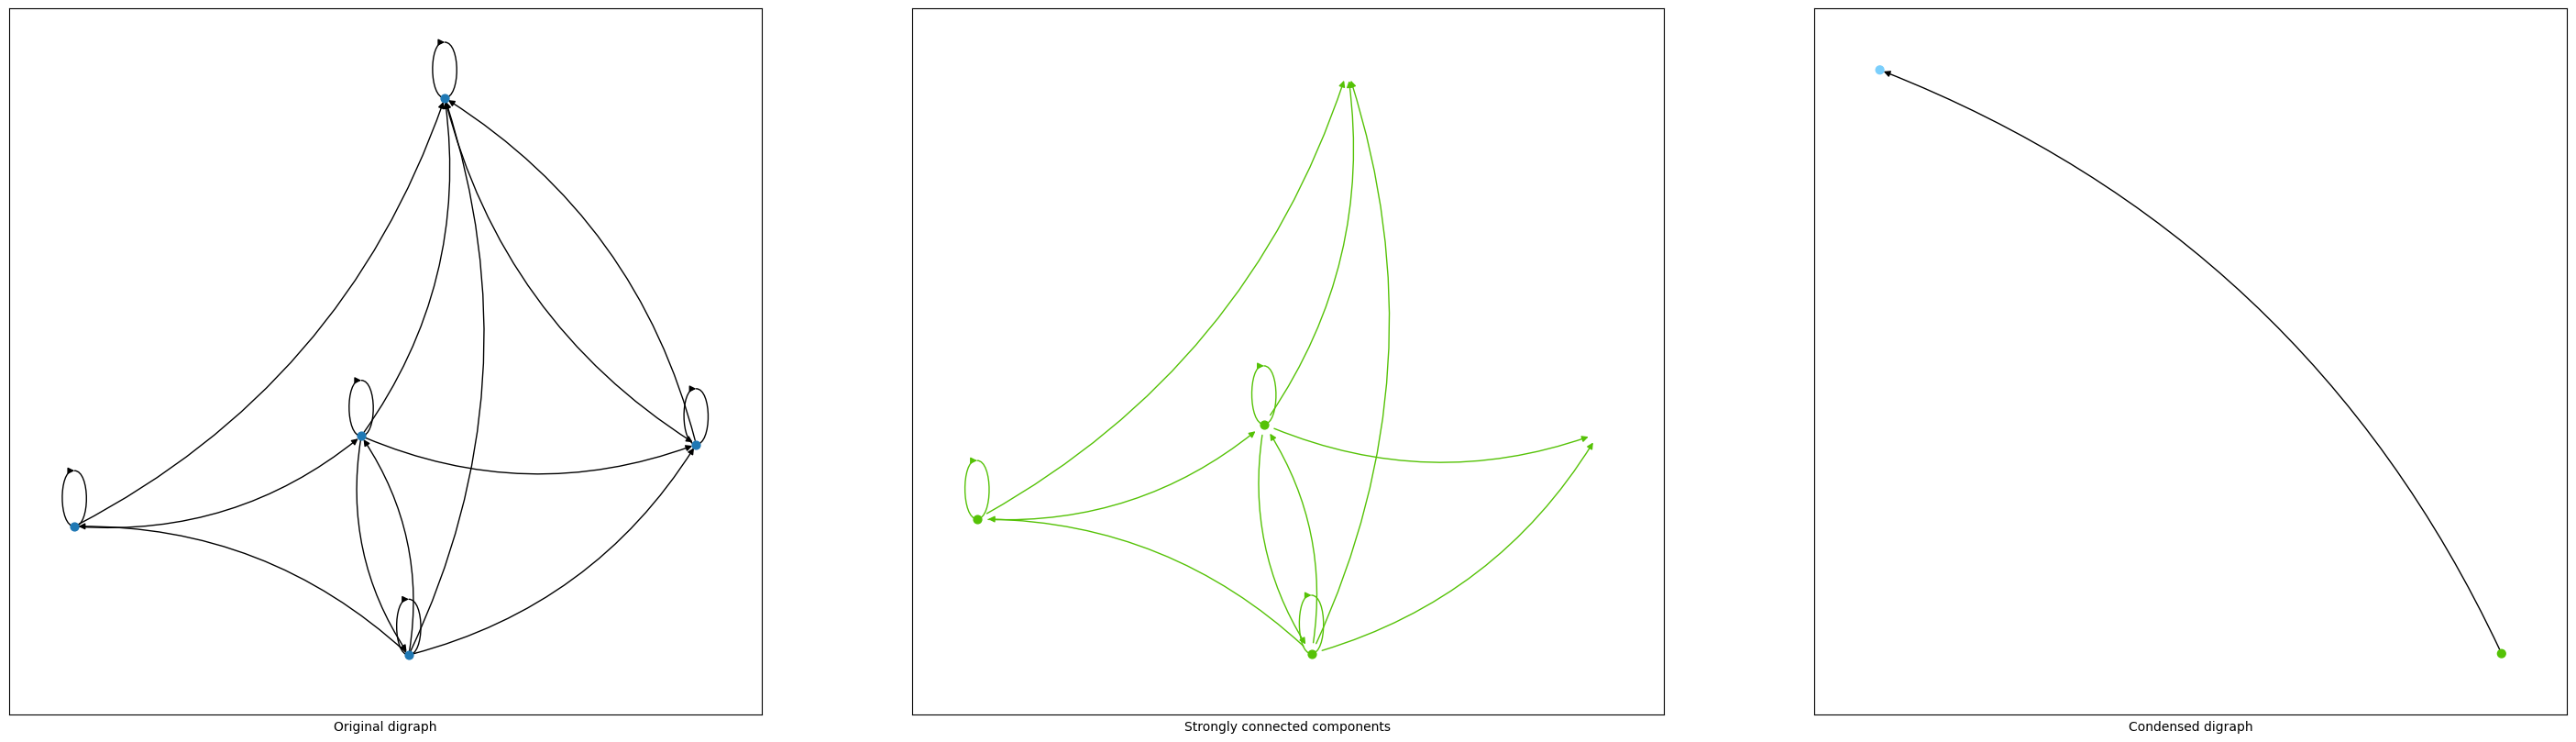

In [7]:
myfs= (30, 10)
fig, axs343 = plt.subplots(1, 3, figsize=(myfs[0]*1.2, myfs[1]))

# Given adjacency matrix
adj_matrix = np.array([
    [0.15, 0.15, 0.1, 0.2, 0.4],
    [0, 0.55, 0, 0, 0.45],
    [0.3, 0.05, 0.05, 0, 0.6],
    [0, 0.4, 0.1, 0.5, 0],
    [0, 0.3, 0, 0, 0.7]
])

# Generate the graph from the adjacency matrix
G_from_adj_matrix = generate_graph_from_adjacency(adj_matrix)

# Plot the condensed graph
plot_condensated_graph(G_from_adj_matrix, axs343)
plt.show()


Ricordiamo che i componenti fortemente connessi possono essere pensati come cicli autonomi all'interno di un grafo diretto dove ogni vertice in a dato ciclo può essere raggiunto da ogni altro vertice nello stesso ciclo:

![title](./images/strongly_connected_components.png)

Il valore di collegamento basso di un nodo è il più piccolo ID nodo [più basso] raggiungibile da quel nodo quando si esegue un DFS (incluso se stesso). Per il nodo 1 ad esempio avremo:

![title](./images/low_link_values.png)

Quindi l'esempio completo seguente avrà i seguenti node id:

![title](./images/low_link_values_complete.png)

Queste info risultano utili nel momento in cui ad esempio si applica l'algoritmo di Tarjan.
L'algoritmo di Tarjan è un algoritmo per trovare tutti i componenti fortemente connessi (SCC) in un grafo diretto. Un componente fortemente connesso è un sottoinsieme massimale di nodi in cui ogni coppia di nodi è raggiungibile dall'altro. In altre parole, è un insieme di nodi in cui esiste un percorso da ogni nodo ad ogni altro nodo all'interno del componente.

Ecco una spiegazione passo per passo dell'algoritmo di Tarjan:

* Inizializzazione: Si inizia dalla scelta di un nodo non ancora visitato e si avvia una DFS (Depth-First Search) da quel nodo. Durante la DFS, si assegnano a ciascun nodo due valori:
    - Il tempo di scoperta (o "discovery time"), che rappresenta l'ordine in cui il nodo è stato visitato durante la DFS.
    - Il valore di collegamento basso (o "low link"), che rappresenta il nodo con il tempo di scoperta più basso raggiungibile dal nodo corrente durante la DFS.

* Ricerca ricorsiva: Durante la DFS, vengono visitati i nodi adiacenti non ancora visitati. Se viene trovato un nodo non ancora visitato, viene avviata una nuova DFS da quel nodo. Durante questa ricerca ricorsiva, i nodi visitati vengono aggiunti a una pila.

* Aggiornamento del valore di collegamento basso: Durante il ritorno dalla DFS ricorsiva, il valore di collegamento basso del nodo corrente viene aggiornato. Questo valore viene aggiornato con il valore di collegamento basso dei nodi adiacenti già visitati.

* Identificazione dei componenti fortemente connessi: Quando il valore di collegamento basso di un nodo coincide con il suo tempo di scoperta, significa che il nodo è la radice di un componente fortemente connesso. A questo punto, tutti i nodi nella pila fino a quel nodo (compreso) formano un componente fortemente connesso. Vengono quindi rimossi dalla pila e il processo continua fino a quando non sono stati identificati tutti i componenti fortemente connessi nel grafo.

* Complessità: L'algoritmo di Tarjan ha una complessità temporale di O(V + E), dove V è il numero di nodi e E è il numero di archi nel grafo.

L'algoritmo di Tarjan è ampiamente utilizzato per trovare i componenti fortemente connessi in grafi diretti, ed è efficiente anche su grafi di grandi dimensioni. È una tecnica fondamentale nell'analisi dei grafi e viene utilizzata in molte applicazioni, come la compilazione del codice, il rilevamento delle dipendenze nel software e molto altro ancora.

Questo è particolarmente utile per trovare i grafi condensati, poiché identifica tutti i componenti fortemente connessi (SCC) in un grafo diretto. I grafi condensati sono costituiti dai nodi dei componenti fortemente connessi come nodi e dagli archi tra i componenti fortemente connessi come archi nel grafo condensato.

Ecco come l'algoritmo di Tarjan può essere utilizzato per trovare i grafi condensati:

* Identificazione dei componenti fortemente connessi: L'algoritmo di Tarjan esplora il grafo e identifica tutti i componenti fortemente connessi. Ogni componente fortemente connesso è identificato come un insieme di nodi che possono raggiungersi tra loro attraverso una serie di archi diretti.

* Costruzione del grafo condensato: Dopo aver identificato tutti i componenti fortemente connessi, è possibile costruire il grafo condensato. In questo grafo, ogni componente fortemente connesso viene rappresentato come un singolo nodo, e gli archi tra i componenti fortemente connessi nel grafo originale diventano archi nel grafo condensato.

* Analisi del grafo condensato: Il grafo condensato può essere analizzato ulteriormente per estrarre informazioni sulla struttura e sulla connettività del grafo originale. Ad esempio, possiamo identificare i cicli nel grafo condensato, che corrispondono a cicli di lunghezza maggiore o uguale a due nel grafo originale.

In breve, l'algoritmo di Tarjan è uno strumento fondamentale per la ricerca dei grafi condensati, poiché consente di identificare in modo efficiente i componenti fortemente connessi nel grafo diretto e di costruire il grafo condensato basato su tali componenti.

Un riscontro manuale di seguito:

![title](./images/cond_graph_es5.1.png)

Condensandolo ci ritroviamo con quello generato dai codici sopra riportati.

## (ii) I relatori sono finalmente d’accordo su una decisione comune?
Sì, i relatori finalmente concordano su una decisione comune cioè $S_2=\{2,5\}$. 
E' possibile, inoltre, osservare l'assenza di stubborn agents.
Di seguito lo verifichiamo.

In [8]:
#definisco la funzione che calcola l'average consensus
def compute_average_consensus(W, x0, num_iterations):
    #lim per k -> infinito di W^k * x(0)
    W_k = np.linalg.matrix_power(W, num_iterations*1000)
    result = np.dot(W_k, x0)
    print("POSSIBLE AVERAGE CONSENSUS: ")
    print(result)
    return result

In [9]:
#definisco la funzione per il french degroot model
def french_degroot_model(W, x0, num_iterations):
    """
     Modello di consenso French-DeGroot.

     parametri:
         W (numpy.ndarray): matrice di adiacenza che rappresenta l'influenza di un agente rispetto ad un altro. 
             La forma della matrice dovrebbe essere (n, n) dove n è il numero di agenti. 
             La voce (i, j) rappresenta l'influenza dell'agente j sull'agente i.
             I valori devono essere compresi tra 0 e 1 e la somma di ciascuna colonna deve essere 1.
         x0 (numpy.ndarray): opinioni iniziali degli agenti. Dovrebbe essere una matrice 1D di lunghezza n, dove n è il numero di agenti.
         num_iterations (int): numero di iterazioni per eseguire il modello.

     Ritorna:
         numpy.ndarray: opinioni di consenso finale dopo il numero specificato di iterazioni.
         numpy.ndarray: opinioni di ciascun agente ad ogni iterazione. Forma (num_iterazioni, n).
     """

    n = len(x0)
    opinions = x0.copy()
    opinions_history = [opinions.copy()]

    for _ in range(num_iterations):
        opinions = np.dot(W, opinions)
        opinions_history.append(opinions.copy())

    return opinions, np.array(opinions_history)

POSSIBLE AVERAGE CONSENSUS: 
[[0.64]
 [0.64]
 [0.64]
 [0.64]
 [0.64]]


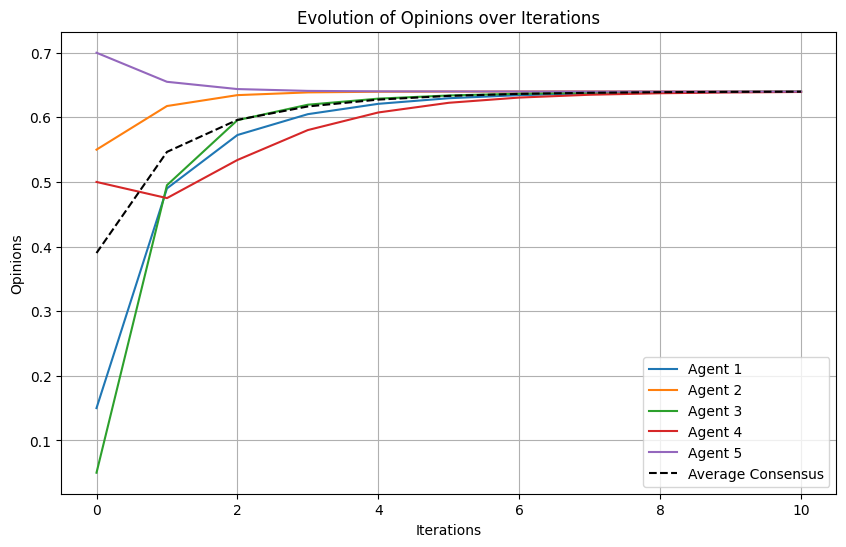

In [10]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.array([
    [0.15, 0.15, 0.1, 0.2, 0.4],
    [0, 0.55, 0, 0, 0.45],
    [0.3, 0.05, 0.05, 0, 0.6],
    [0, 0.4, 0.1, 0.5, 0],
    [0, 0.3, 0, 0, 0.7]
])

# Condizioni iniziali degli agenti
x0 = np.array([0.15, 0.55, 0.05, 0.5, 0.7]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 10

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

## (iii) In caso di accordo, il parere iniziale di qualche relatore viene rifiutato? Se sì, quali?
Si le opinioni iniziali dei relatori del set di nodi $S_1=\{1,3,4\}$

## (iv) Assumere che le opinioni iniziali dei relatori siano le loro autovalutazioni (ovvero, i pesi propri $a_{11}$,..., $a_{55}$) e calcolare il giudizio finale tramite calcoli elementari.
Vedere l'average consensuns sopra calcolato dopo 10 iterazioni.

![title](./images/es5.2.png)

## (i)
In questo scenario, tutti danno lo stesso peso all’opinione di tutti, compresi se stessi.
Poiché tutti danno lo stesso peso agli altri, compresi se stessi, la matrice della media A avrà tutte le voci uguali a $1/n$​, dove n è il numero di individui.

$$ A = \frac{1}{n} \cdot \begin{pmatrix} 1 \ 1 \ \cdots \ 1 \\ 1 \ 1 \ \cdots \ 1 \\ \vdots \ \vdots \ \ddots \ \vdots \\ 1 \ 1 \ \cdots \ 1 \end{pmatrix} $$

L’equazione di aggiornamento del consenso diventa:

$$ x_i(k + 1) = \frac{1}{n} \sum_{j=1}^{n} x_j(k) $$

Questo rappresenta l'opinione media di tutti gli individui al tempo k. Poiché la matrice A è stocastica per righe, il sistema convergerà verso un vettore di opinioni di consenso in cui tutte le opinioni sono uguali.

### Esempio:

POSSIBLE AVERAGE CONSENSUS: 
[[0.33333333]
 [0.33333333]
 [0.33333333]]


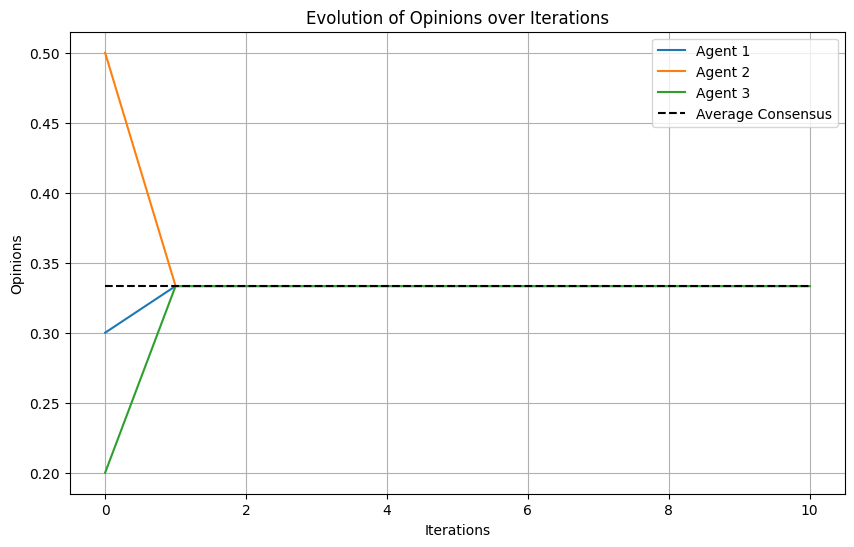

In [19]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.full((3, 3), 1/3)

# Condizioni iniziali degli agenti
x0 = np.array([0.3, 0.5, 0.2]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 10

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

## (ii)
L'individuo 1 attribuisce lo stesso peso alle opinioni sue e di tutti gli altri. Ogni individuo 2, . . . , n calcola la media tra la propria opinione e quella dell'individuo 1:

In questo scenario, la matrice della media A avrà la prima riga composta da 1/n per ciascun elemento, e ogni riga successiva avrà 1/2 per l'elemento corrispondente con il primo elemento pari a 1/2 (riflettendo il pari peso dato a l'opinione dell'individuo 1 e la propria) e il resto è 1/(2n) poiché l'opinione dell'individuo 1 ha lo stesso peso.

$$ A = \begin{bmatrix} \frac{1}{n} \ \frac{1}{n} \ \cdots \ \frac{1}{n} \\ \frac{1}{2} \ \frac{1}{2n} \ \cdots \ \frac{1}{2n} \\ \vdots \ \vdots \ \ddots \ \vdots \\ \frac{1}{2} \ \frac{1}{2n} \ \cdots \ \frac{1}{2n} \end{bmatrix} $$

L’equazione di aggiornamento della convergenza diventa:
$$ x_i(k + 1) = \frac{1}{n} x_i(k) + \frac{1}{2} x_1(k) + \frac{1}{2n} \sum_{j=2}^{n} x_j(k) $$

Ciò rappresenta la media dell'opinione di un individuo con l'opinione dell'individuo 1, equamente ponderata, e la media della propria opinione con le opinioni di altri individui, dove l'opinione di ciascun altro individuo ha equamente ponderato.

POSSIBLE AVERAGE CONSENSUS: 
[[0.32857143]
 [0.32857143]
 [0.32857143]]


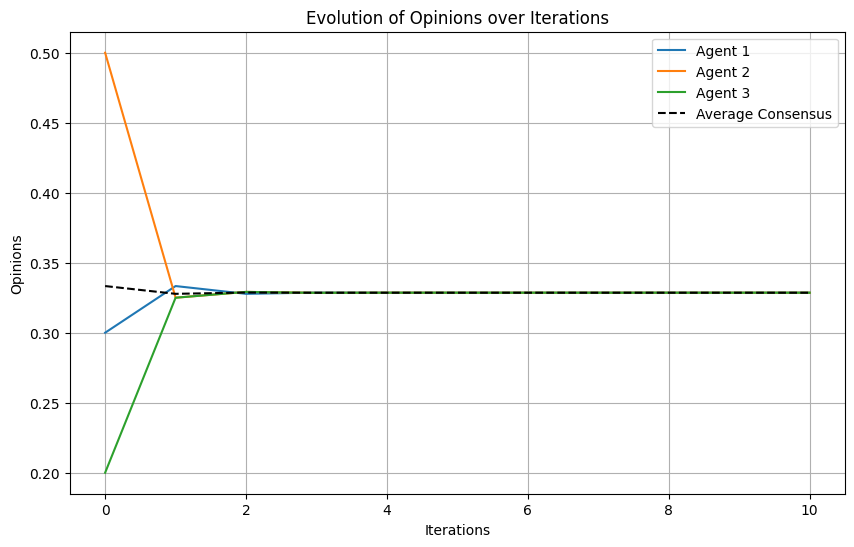

In [20]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.array([[1/3, 1/3, 1/3], [1/2, 1/4, 1/4], [1/2, 1/4, 1/4]])

# Condizioni iniziali degli agenti
x0 = np.array([0.3, 0.5, 0.2]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 10

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

## (iii)
L'individuo 1 non cambia la sua opinione. Ogni individuo 2, . . . , n calcola la media tra la propria opinione e quella dell'individuo 1:

In questo scenario, la matrice della media A sarà simile allo scenario (ii), ma la prima riga sarà composta da 1 per il primo elemento e 0 per il resto poiché l'opinione dell'individuo 1 non cambia.

$$ 
A = \begin{bmatrix} 1 \ 0 \ \cdots \ 0 \\ \frac{1}{2} \ \frac{1}{2n} \ \cdots \ \frac{1}{2n} \\ \vdots \ \vdots \ \ddots \ \vdots \\ \frac{1}{2} \ \frac{1}{2n} \ \cdots \ \frac{1}{2n} \end{bmatrix}
$$

L’equazione di aggiornamento del consenso diventa:

$$ x_i(k + 1) = x_i(k) + \frac{1}{2} x_1(k) + \frac{1}{2n} \sum_{j=2}^{n} x_j(k) $$

Ciò significa che l'opinione dell'individuo 1 rimane costante e gli individui da 2 a n aggiornano le proprie opinioni facendo la media della propria opinione con quella dell'individuo 1 e con la media delle opinioni degli altri individui. Il sistema convergerà verso un vettore di opinione finale in cui viene calcolata la media delle opinioni degli individui da 2 a n.

### Esempio:

POSSIBLE AVERAGE CONSENSUS: 
[[0.3]
 [0.3]
 [0.3]]


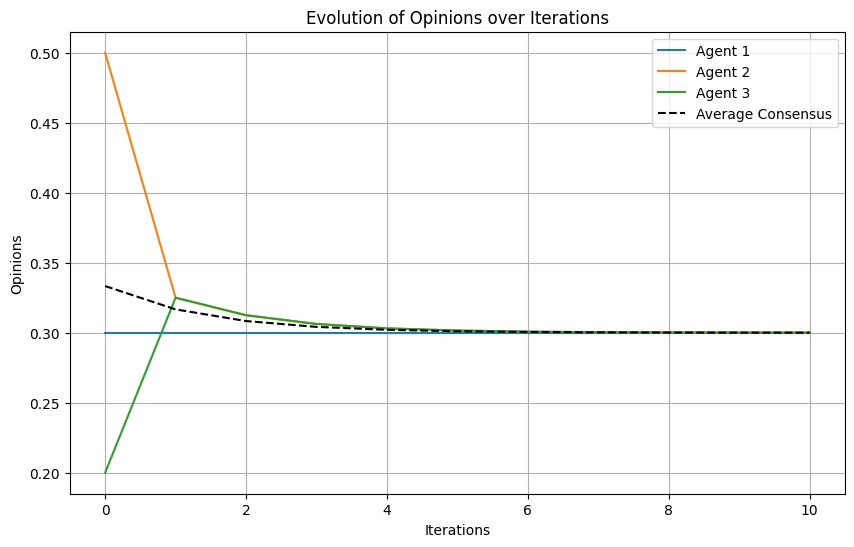

In [21]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.array([[1, 0, 0], [1/2, 1/4, 1/4], [1/2, 1/4, 1/4]])

# Condizioni iniziali degli agenti
x0 = np.array([0.3, 0.5, 0.2]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 10

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

![title](./images/es5.5.png)

# Dimostrazione della proprietà della matrice equal-neighbor row-stocastica

## (i) Row-stocastico

Per dimostrare che $A_{\text{equal-nghbr}}$ è row-stocastico, dobbiamo provare che ogni riga somma a 1.

Per dimostrare questo per $A_{equal-nghbr}$, useremo la proprietà che per una matrice row-stocastica M, $M \times 1=1$, dove 1 è un vettore colonna di uno.

1. Semplificazione
   * Sappiamo che $I_n \times 1=1$ (la matrice identità moltiplicata per il vettore è uguale a uno).
   * $A \times 1=D_{out} \times 1$ (la somma dei pesi degli outgoing edge da ciascun nodo è uguale al suo weighted out-degree).
   * Perciò, $(I_n + A) \times 1=(I_n + D_{out}) \times 1$.

2. Inverso e trasformazione:
   * $(I_n + D_{out})^{-1}$ è l'inverso di una matrice che trasforma 1 in se stessa scalata per gli out-degress più 1.
   * Applicando $(I_n + D_{out})^{-1}$ a $(I_n + D_{out}) \times 1 $ essenzialmente inverte questa trasformazione, risultando di nuovo in 1.
  
$$ 
A_{equal-nghbr} \times 1=(I_n + D_{out})^{-1} \times (I_n + A) \times 1=1
$$

Ciò dimostra che ogni riga di $A_{equal-nghbr}$ somma a 1, rendendolo stocastico per righe.

### Alternativamente
Per dimostrare che $A_{\text{equal-nghbr}}$ è row-stocastico, dobbiamo provare che ogni riga somma a 1.

Sia $e_i$ il vettore base standard $i$-esimo (un vettore con un 1 nella posizione $i$-esima e 0 altrove), e sia $\mathbf{1}$ il vettore di tutti 1.

Quindi, per la $i$-esima riga di $A_{\text{equal-nghbr}}$, indicata come $(A_{\text{equal-nghbr}})_i$:

$$(A_{\text{equal-nghbr}})_i = (I_n + D_{\text{out}})^{-1}(I_n + A)e_i$$

Ora, nota che $(I_n + D_{\text{out}})^{-1}(I_n + A)$ è una matrice column-stocastica perché $(I_n + D_{\text{out}})$ è una matrice diagonale con le entrate diagonali che rappresentano i gradi di uscita, e $(I_n + A)$ rappresenta la matrice di adiacenza.

Moltiplicare una matrice column-stocastica per un vettore con entries che sommano a 1 (che è il caso di $e_i$) produce un vettore in cui ogni entrata è una combinazione convessa delle colonne della matrice, e quindi ogni entrata è non negativa e somma a 1.

Quindi, ogni riga di $A_{\text{equal-nghbr}}$ somma a 1, dimostrando che è row-stocastico.

## (ii) Primitivo se e solo se fortemente connesso

La matrice $A_{\text{equal-nghbr}}$ è primitiva se e solo se esiste un intero positivo $k$ tale che $(A_{\text{equal-nghbr}})^k$ abbia tutte le entries positive.

Il grafo $G$ è fortemente connesso se e solo se esiste un intero positivo $k$ tale che tutte le entries di $A^k$ siano positive, dove $A$ è la matrice di adiacenza di $G$.

Dal momento che $A_{\text{equal-nghbr}} = (I_n + D_{\text{out}})^{-1}(I_n + A)$, e $(I_n + D_{\text{out}})^{-1}$ e $(I_n + A)$ sono entrambi matrici non negative, se $G$ è fortemente connesso, allora $A_{\text{equal-nghbr}}$ è primitivo.

Viceversa, se $A_{\text{equal-nghbr}}$ è primitivo, allora esiste un intero positivo $k$ tale che $(A_{\text{equal-nghbr}})^k$ abbia tutte le entries positive. Dal momento che $(I_n + D_{\text{out}})^{-1}$ e $(I_n + A)$ sono matrici non negative, ciò implica che $(I_n + A)^k$ abbia tutte le entries positive. Quindi, $G$ è fortemente connesso.

Quindi ricapitolando:

Una matrice è primitiva se è non negativa ed esiste un $k>0$ tale che tutti gli elementi della matrice elevata a k sono strettamente positivi. Affinchè $A_{equal-nghbr}$ sia primitiva, significa che dev'esserci qualche k dove $(A_{equal-nghbr})^k$ ha tutti gli elementi positivi. Ciò indica l'esistenza di percorsi di lunghezza k tra due nodi qualsiasi del grafico.

* Connessione tra $A_{equal-nghbr}$ e G:
    * Se G è fortemente connesso, c'è un percorso tra due nodi qualsiasi.
    * Questo implica che per qualche k, tutti gli elementi di $(A_{equal-nghbr})^k$ saranno positivi. Percorsi di varia lunghezza possono essere combinati per raggiungere qualsiasi nodo da qualsiasi altro nodo in un grafo fortemente connesso. Ciò soddisfa la condizione affinchè $A_{equal-nghbr}$ sia primitiva.
* Implicazione inversa
    * Se $A_{equal-nghbr}$ è primitiva, allora per qualche k, $(A_{equal-nghbr})^k$ ha tutti gli elementi positivi.
    * Ciò indica che ci sono percorsi di lunghezza k (o meno) tra due nodi qualsiasi in G.
    * Pertanto G deve essere fortemente connesso.
 
In conclusione, $A_{equal-nghbr}$ è primitiva se e solo se G è fortemente connesso.

## (iii) Doppia stocastica se G è bilanciato e il grado ponderato è costante
Affinchè $A_{equal-nghbr}$ sia doppiamente stocastica, dobbiamo provare che $A \times 1 = D_{out} \times 1= D_{in} \times 1$ (la somma delle colonne somma a 1). 

* Weight-Balanced and Constant Weighted Degree:
    * Dato che G è weight-balanced e il grado ponderato è costante per tutti i nodi ($D_{out} = D_{in} = dI_n$ per qualche d>0), la somma dei pesi degli archi in entrata è uguale alla somma dei pesi degli archi in uscita per ciascun nodo.
* Uguaglianza di $A \times 1$ e $D_{in} \times 1$:
    * Poichè $D_out = D_{in}$, segue che $A \times 1$ (somma dei pesi degli outgoing edge da ciascun nodo) = $D_{out} \times 1$ (somma dei pesi di ciascun nodo) = $D_{in} \times 1$ (somma dei pesi che entrano in ciascun nodo).

In condizioni di weight-balanced e weighted degree costante, $A_{equal-nghbr}$ soddisfa sia le proprietà stocastiche di riga che quelle stocastiche di colonna, rendendolo doppiamente stocastico.

### Alternativamente

Se $G$ è bilanciato e il grado ponderato è costante per tutti i nodi, allora $D_{\text{out}} = D_{\text{in}} = dI_n$ per qualche $d \in \mathbb{R}^+$.

Sostituendo $D_{\text{out}} = D_{\text{in}} = dI_n$ in $A_{\text{equal-nghbr}}$, otteniamo:

$$A_{\text{equal-nghbr}} = (I_n + dI_n)^{-1}(I_n + A) = \frac{1}{1+d}(I_n + A)$$

Ora, poiché $G$ è bilanciato, la somma per riga di $A$ è la stessa per tutte le righe, ed è $\mathbf{1}$, il vettore di tutti 1. Quindi, la somma per riga di $A_{\text{equal-nghbr}}$ sarà:

$$\frac{1}{1+d}(\mathbf{1} + \mathbf{1}) = \frac{2}{1+d}\mathbf{1}$$

Dal momento che $d$ è una costante positiva, $\frac{2}{1+d}$ è anch'essa una costante. Quindi, ogni riga di $A_{\text{equal-nghbr}}$ somma alla stessa costante, e $A_{\text{equal-nghbr}}$ è doppiamente stocastica.

![title](./images/es5.22.png)

Questo problema consiste nel dimostrare che due espressioni per il coefficiente 1 di ergodicità, $\tau_1(A)$, sono equivalenti per una matrice stocastica per righe.
#### La prima espressione è data da:
$$\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 $$

#### La seconda espressione è data da:
$$\frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}|$$

#### E questo dovrebbe essere dimostrato essere uguale a:
$$1 - \min_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\}$$

Proviamo ad affrontare questa dimostrazione passo dopo passo.

Passaggio 1: comprensione delle matrici stocastiche per righe
* Una matrice stocastica per righe A ha elementi non negativi tali che ogni riga ha la somma di 1.

Passaggio 2: interpretazione delle espressioni
* La prima espressione $\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 $ cerca la norma 1 massima del prodotto matrice-vettore $A^ty$ , dove y è un vettore non negativo la cui 1-norma è 1.

    ##### Spiegazione:
    - La seconda espressione calcola la massima differenza assoluta di riga tra tutte le coppie di righe in.
    - La terza espressione calcola 1 meno la somma più piccola dei minimi degli elementi tra tutte le coppie di righe in A.

Passaggio 3: dimostrare l'equivalenza

* Dalla prima alla seconda espressione:
    * la prima espressione può essere interpretata come la massima deviazione possibile dall'equilibrio che un sistema può raggiungere dopo un singolo passo dallo stato iniziale y.

    ##### Spiegazione:
    Poiché ogni riga ha come somma 1, la norma 1 di $A^ty$ è massimizzata quando il vettore y viene scelto in modo tale che la differenza tra le voci di $A^ty$ sia massimizzata. Ciò equivale a trovare la coppia di righe in A che hanno la massima differenza in qualsiasi colonna.

* Dalla seconda alla terza espressione
    * La seconda espressione, che somma le differenze assolute, è simile alla somma di tutte le differenze (indipendentemente dal segno) tra gli elementi di due righe. Poiché la somma delle righe dà 1, se sommiamo i minimi anziché le differenze assolute, in sostanza calcoliamo la sovrapposizione totale tra le righe. Sottraendo questo da 1 si ottiene la non sovrapposizione totale, che dovrebbe essere uguale alla somma delle differenze assolute poiché entrambi i calcoli rappresentano la deviazione totale distribuita sulle due righe.

* Dimostrare l'uguaglianza
    * Per dimostrare che la seconda espressione è uguale alla terza, dobbiamo riconoscerla per ciascuna coppia di elementi $a_{ih}$ ed $a_{jh}$ dalle righe i e j rispettivamente, la somma $|a_{ih} - a{jh}|$ è in realtà uguale a $a_{ih} + a_{jh} -2min\{a_{ih},a_{jh}\}$ perché stiamo effettivamente rimuovendo la sovrapposizione conteggiata due volte (una volta in ciascun elemento) e lasciando solo la differenza.

La somma di tutti gli elementi nelle righe i e j quindi semplifica a $1 - \min_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\}$ perché la somma totale di ogni riga è 1.

Pertanto, la somma massima delle differenze assolute tra qualsiasi coppia di righe è uguale a 1 meno la somma minima delle sovrapposizioni tra qualsiasi coppia di righe, che è ciò che dobbiamo dimostrare.

La risposta finale è che le due espressioni per il coefficiente 1 di ergodicità di una matrice stocastica di riga A sono effettivamente equivalenti.

## Matematicamente:
Per dimostrare l'equivalenza delle espressioni per il coefficiente di ergodicità di ordine 1 ($\tau_1(A)$), cominciamo mostrando che ciascuna espressione è minore o uguale alle altre. Poi dimostriamo l'uguaglianza tra di esse.

1. **Dimostrazione che $\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 \leq \frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}|$:**

Sia $y$ un vettore tale che $\|y\|_1 = 1$ e $y \perp \mathbf{1}_n$. Allora per ogni $i, j \in \{1,...,n\}$, abbiamo:

$$
\begin{align*}
\|A^T y\|_1 &= \sum_{h=1}^{n} |(A^T y)_h| \\
&= \sum_{h=1}^{n} \left| \sum_{k=1}^{n} a_{kh}y_k \right| \\
&\leq \sum_{h=1}^{n} \sum_{k=1}^{n} |a_{kh}y_k| \quad \text{(per l'ineguaglianza triangolare)} \\
&= \sum_{k=1}^{n} \left( |y_k| \sum_{h=1}^{n} |a_{kh}| \right) \quad \text{(per la linearità della somma)} \\
&= \sum_{k=1}^{n} |y_k| \sum_{h=1}^{n} |a_{kh}| \quad \text{(poiché $|y_k|$ è sempre positivo)} \\
&= \sum_{k=1}^{n} |y_k| \quad \text{(poiché $A$ è row-stochastic)} \\
&= \|y\|_1 \\
&= 1
\end{align*}
$$

Quindi, $\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 \leq 1$.

D'altra parte, osserviamo che:

$$
\begin{align*}
\sum_{h=1}^{n} |a_{ih} - a_{jh}| &= \sum_{h=1}^{n} |a_{ih} - a_{jh}| \\
&= \sum_{h=1}^{n} (a_{ih} - a_{jh}) \quad \text{(poiché entrambi i termini sono non negativi)} \\
&= \sum_{h=1}^{n} a_{ih} - \sum_{h=1}^{n} a_{jh} \\
&= 1 - 1 \quad \text{(poiché $A$ è row-stochastic)}
\end{align*}
$$

Quindi, $\max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}| = 1$.

Perciò, $\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 \leq \frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}|$.

2. **Dimostrazione che $\frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}| \leq 1 - \min_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\}$:**

Siano $i, j$ indici tali che:

$$
\sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\} = \min_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\}
$$

Allora, per ogni $i, j$, abbiamo:

$$
\begin{align*}
\sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\} &\leq \sum_{h=1}^{n} \left( \frac{a_{ih} + a_{jh}}{2} \right) \quad \text{(per l'ineguaglianza tra la media aritmetica e geometrica)} \\
&= \frac{1}{2} \sum_{h=1}^{n} a_{ih} + \frac{1}{2} \sum_{h=1}^{n} a_{jh} \\
&= \frac{1}{2} + \frac{1}{2} \\
&= 1
\end{align*}
$$

Quindi, $\frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}| \leq 1$.

Perciò, abbiamo dimostrato che ciascuna espressione è minore o uguale a 1. Per dimostrare l'uguaglianza, consideriamo $A$ una matrice doppiamente stocastica, in cui ogni colonna e ogni riga sommano a 1. In questo caso:

$$
\begin{align*}
\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 &= \max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 \\
&= \max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|y\|_1 \\
&= 1
\end{align*}
$$

Inoltre, per ogni $i, j$, poiché $A$ è doppiamente stocastica:

$$
\begin{align*}
\sum_{h=1}^{n} |a_{ih} - a_{jh}| &= \sum_{h=1}^{n} (a_{ih} - a_{jh}) \\
&= \sum_{h=1}^{n} a_{ih} - \sum_{h=1}^{n} a_{jh} \\
&= 1 - 1 \\
&= 0
\end{align*}
$$

E:

$$
\sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\} = 1
$$

Quindi, in questo caso, l'uguaglianza vale per tutte le espressioni. Pertanto, le espressioni sono equivalenti.